In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
summ = pd.read_csv('summtab.csv')
phase = pd.read_csv('phasetab.csv')
cross2 = Table.read('part2files.csv')
cross2 = join(cross2,full,keys='src_n')

# Optical Period of Sources with Known Orbital from X-ray


# 1. Shapes of Phase-Fold when Period from X-ray

### 7: known period of 21.9 but previously found 24.8 better
- look for aliases
- shape of 21.9 fold

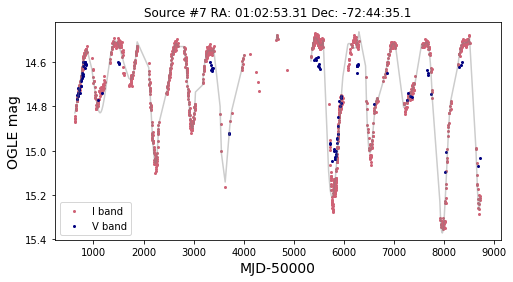

In [2]:
iband,vband = o.getIV(7,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=200,break_tolerance=100,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [3]:
o.splinedetrend(iband,window=200,btol=100)

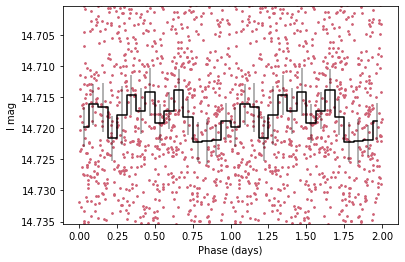

In [4]:
pd = 21.9
o.phasestep(iband,pd,16,det=True,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)

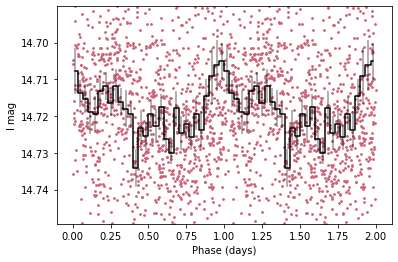

In [5]:
pd = 24.79
o.phasestep(iband,pd,30,det=True,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3)

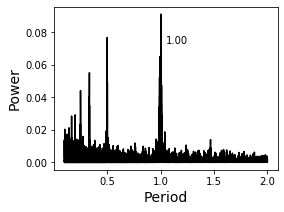

In [6]:
freq,power,bp = o.periodogram(iband,more=True,det=True,minp=0.1,maxp=2)
pf = o.findpeaks(freq,power,pkorder=True)

In [7]:
len(pf)

16

In [8]:
o.aliasarr(pf['period'])

array([[2.39494133e+02, 2.64522401e+02, 1.00142946e+00, 1.44952252e+02,
        9.90469525e-01, 1.00103342e+00, 2.18792666e+02, 3.16145342e+02,
        1.00182582e+00, 5.00358385e-01, 1.69171825e+02, 1.03871585e+02,
        4.99666979e-01, 1.53175813e+02, 1.00417321e+00, 5.00259495e-01],
       [5.01046051e-01, 5.00946889e-01, 3.33492011e-01, 4.98281223e-01,
        3.32267620e-01, 3.33448078e-01, 5.01145251e-01, 5.00792028e-01,
        3.33535955e-01, 2.50089564e-01, 4.98526567e-01, 4.97604712e-01,
        2.49916717e-01, 4.98373199e-01, 3.33795737e-01, 2.50064857e-01]])

In [9]:
reload(o)
o.findbeat(21.9,218.79)

24.33592869114734

## 64: Carpano et al. 2017
- summary: period known from X-ray; makes sinusoidal profile even with other numbers within error
    - alias of low period gets very close but not exactly this period

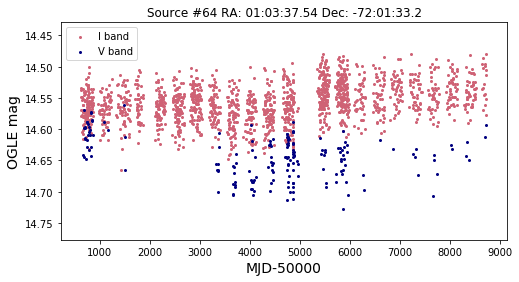

In [10]:
iband,vband = o.getIV(64,cross,stack=True,plot=True)

In [11]:
o.splinedetrend(iband,window=300)

26.17077112072268


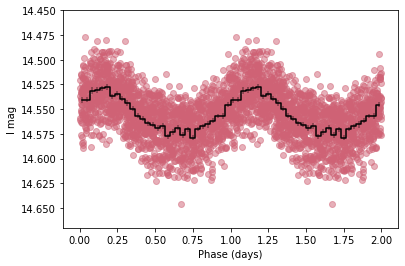

In [12]:
#phase-fold with best period
bp = o.periodogram(iband,minp=5,maxp=200,plot=False)
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,det=True,divide=True)

plt.ylim(14.67,14.45)
print(bp)

26.188


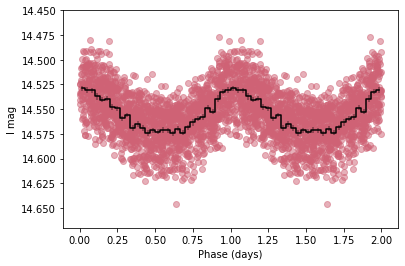

In [13]:
#phase-fold with best period
bp = 26.188 #Carpano X-ray period 26.188±0.045
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,det=True,divide=True)

plt.ylim(14.67,14.45)
print(bp)

shows sinusoidal doesn't rule out orbital, just need to check alias (below)

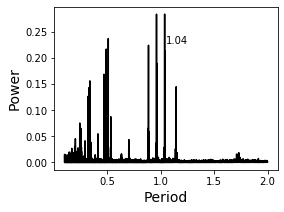

In [14]:
freq,power,bp = o.periodogram(iband,more=True,det=True,minp=0.1,maxp=2)
pf = o.findpeaks(freq,power,pkorder=True)

In [15]:
pf['period'][2]

0.5090258904851275

In [16]:
o.aliasarr(pf['period']) #close but none are exact

array([[28.20120344, 24.42031305,  1.03676728,  7.74078178,  0.96066499,
        26.17782039, 26.17203729,  0.88345247,  0.50831454,  7.90986966,
         0.48930984,  1.03382958,  0.95814221,  0.46905828,  0.88558714,
         1.14114535,  8.08515049,  0.31901178,  0.46845874,  7.58067526,
         0.33669776,  0.32825288,  0.50761053,  7.90856933,  0.48865451,
         0.5090237 ,  0.70067844,  0.33700735,  0.33638733],
       [ 0.50902488,  0.48996802,  0.33732085,  0.46966307,  0.32884508,
         0.50973603,  0.49062689,  0.31929267,  0.25206149,  0.53373879,
         0.24729858,  0.33700927,  0.32854896,  0.24201758,  0.31957107,
         0.34766736,  0.53295914,  0.19475408,  0.24185787,  0.46906199,
         0.20120632,  0.19815982,  0.25188826,  0.47026843,  0.24713108,
         0.25223575,  0.29178438,  0.20131684,  0.20109543]])

In [17]:
o.aliasarr([1.039717496773951])

array([[26.17782039],
       [ 0.50973603]])

but aliasing from known period too; aliasing can go either way

1.039717496773951


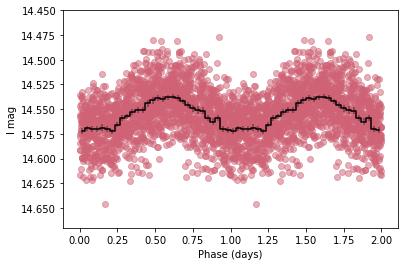

In [18]:
bp = 1.039717496773951 #alias of correct period
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,det=True,divide=True)

plt.ylim(14.67,14.45)
print(bp)

In [19]:
summ[summ['est. period method']=='X-ray']

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
5,6,14.259583,-72.43188,5.05,0.5,17.13,0.902515,SXP 5.05,15.905905,0.095154,...,0.3,changed est. 17.2 to 17.13,-1.266705,0.786946,-1.381626,0.596449,17.347929,1.0,0.092,NO
6,7,15.722455,-72.74299,6.85,0.5,21.90,0.421283,NaN,14.721636,0.219999,...,NaN,3 epochs,1.011883,0.099615,0.927689,-0.508443,23.961722,1.0,0.295,NO


In [20]:
summ.columns


Index(['src_n', 'ra_deg', 'dec_deg', 'spin period', 'perr', 'est. period',
       'sep', 'name', 'mean I', 'stdev I', 'max I', 'min I', 'I range',
       'mean V', 'stdev V', 'max V', 'min V', 'V range', 'est. period method',
       'best period', 'best superorbital', 'other period', 'period shape',
       'big dip', 'orbital cont', 'superorbital cont', 'mult superorbital',
       'changing superorbital amp', 'redder when brighter', 'I V-I corr',
       'V V-I corr', 'I V-I slope', 'I V-I int', 'V V-I slope', 'V V-I int',
       'V-I transition', 'Type II amp', 'note', 'I skew', 'I kurtosis',
       'V skew', 'V kurtosis', 'best auto det pd', 'Part', 'I IQR',
       'aperiodic quiescence'],
      dtype='object')

## 6: SXP 5.05 with orbital 17.13

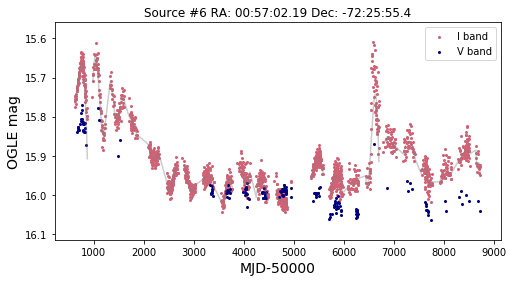

In [21]:
iband,vband = o.getIV(6,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=100,break_tolerance=20,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [22]:
o.splinedetrend(iband,window=100,btol=20)

17.344983491530225


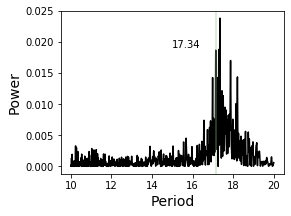

In [23]:
bp = o.periodogram(iband,det=True,minp=10,maxp=20)
plt.axvline(17.13,color='darkseagreen',alpha=0.4)
print(bp)

17.344983491530225


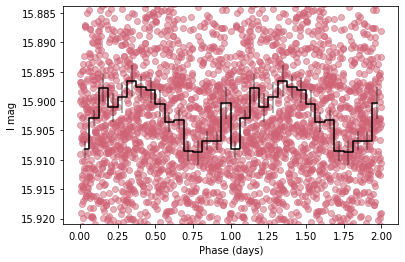

In [24]:
#phase-fold with best period
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

print(bp)

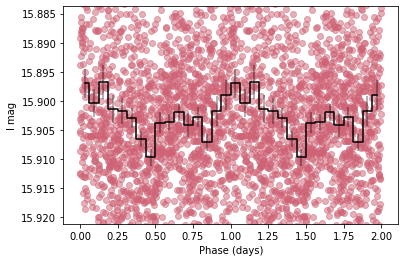

In [25]:
bp = 17.13
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

still decent shape but not FRED

# 27: X-ray outburst pattern of 362.3±4.1 d
- to do: see if more recent X-ray observations

In [26]:
summ[summ['spin period']==82.4]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
25,27,13.037084,-72.63416,82.4,0.6,362.3,0.333036,NaN,15.115796,0.292898,...,NaN,NaN,0.079026,-1.602477,0.215941,-1.55104,326.153217,1.0,0.6,NO


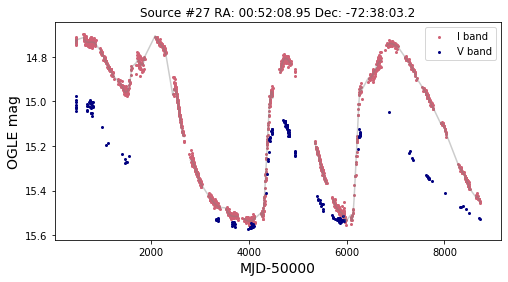

In [27]:
iband,vband = o.getIV(27,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=100,break_tolerance=20,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [28]:
o.splinedetrend(iband,window=100,btol=20)

<Quantity 361.49286883>

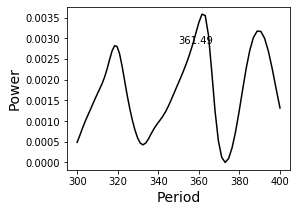

In [29]:
o.periodogram(iband,det=True,minp=300,maxp=400)

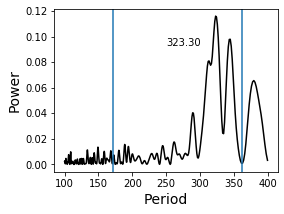

In [30]:
o.periodogram(iband,det=False,minp=100,maxp=400)
plt.axvline(362)
plt.axvline(171)

In [31]:
o.findbeat(171.1,362.3)

324.2130230125523

very low power, but does nearly identify the X-ray outburst period

not seeing high power at 171 days as claimed, but beat periods here: 171, 362, and the maximum without detrending of 323

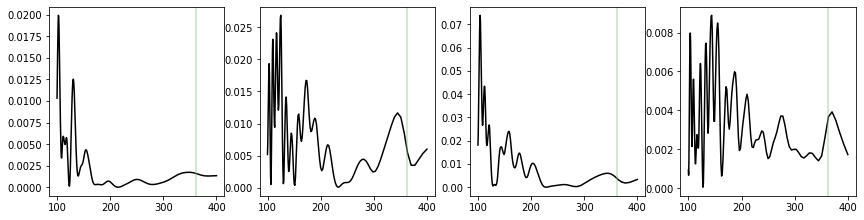

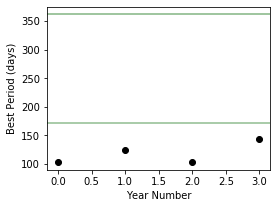

In [32]:
#check by 1000 days at a time
yrs = o.yrpd(iband,det=True,minp=100,maxp=400,orb=362,plotpd=True,spline=True,plotbest=True,sects=2000) #use plotpd --> often low power at 362
plt.axhline(171,color='darkseagreen')
plt.axhline(363,color='darkseagreen')

also difficult to get period around there b/c of window function

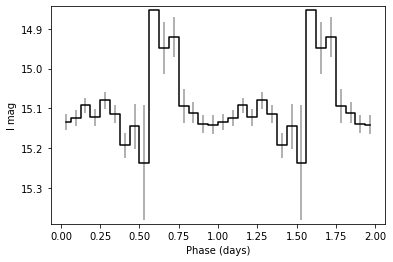

In [33]:
bp = 362.3
# plt.scatter((iband['MJD-50000']%bp)/bp,iband['I mag'],color=pink,alpha=0.5)
# plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I mag'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=False,divide=True)

- notice how fold looks quite good but not identified in periodogram
    - 323 peak does look very good/sinusoidal
- this one does have good FRED shape, though that's not being well-identified below 
- skew and kurtosis would identify it in FRED trend

In [34]:
o.combine(27,cross,full,iband=iband,pd=362.3,pbins=16,det=False,close=True,testbins=False)

{'period': 362.3,
 'amp': 0.3816000000000006,
 'phase diff': 0.9375,
 'phase max': 0.53125,
 'phase min': 0.59375,
 'shape': 'not FRED',
 'diff mean': 0.14543491425410127,
 'mean': 15.090165085745898,
 'skew': -1.1224314128380566,
 'kurtosis': 0.5417078351073554,
 'symm sum': 0.05509979072459613,
 'mean err': 0.03649987706353769}

## 2: SXP 2.16; look for 82.5 ± 0.7

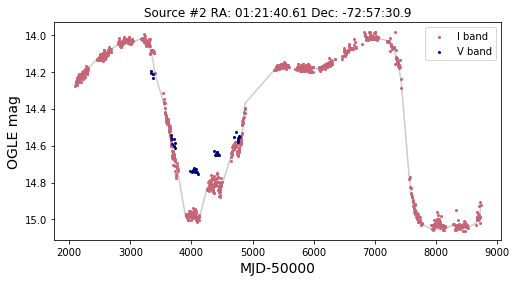

In [35]:
iband,vband = o.getIV(2,cross,stack=True,plot=True)
flatten, trend = wotan.flatten(iband['MJD-50000'],iband['I mag'],method='rspline',window_length=100,break_tolerance=20,return_trend=True)
plt.plot(iband['MJD-50000'],trend,color='grey',alpha=0.4)

In [36]:
o.splinedetrend(iband,window=100,btol=20)

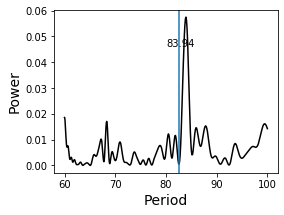

In [37]:
bp = o.periodogram(iband,det=True,minp=60,maxp=100)
plt.axvline(82.5)#uncertainty does not overlap peak here

83.94400147117449


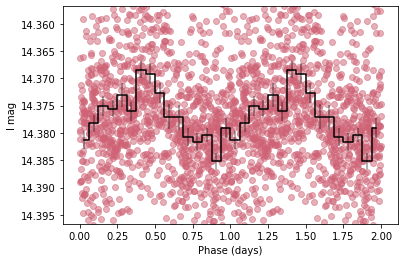

In [38]:
#best optical period (from periodogram above)
print(bp)
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

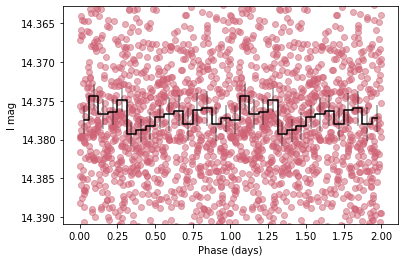

In [39]:
#X-ray period --> nothing
bp = 82.5
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

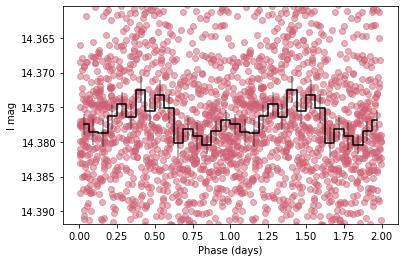

In [40]:
#X-ray period 2 --> better here
bp = 81.78
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,det=True,divide=True)

# More X-ray Periods (from Schmidtke)

### Source 3 (SXP 2.37): 18.38 days
- interesting source b/c confirmed this periodicity by-eye, within uncertainty, using LC lines
- but then found that it doesn't work so well with periodogram, phase-fold, hence 17.4 being better

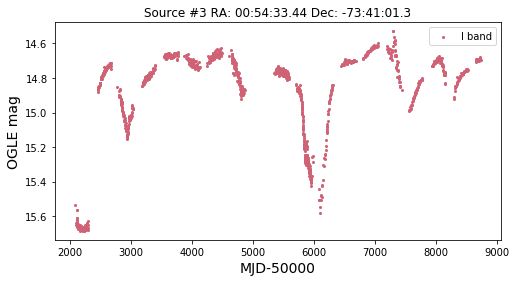

In [41]:
#18.38 +/- 0.2 for SXP 2.37
iband = o.getIV(3,cross,both=False,plot=True,stack=True)

In [42]:
o.splinedetrend(iband,window=300)

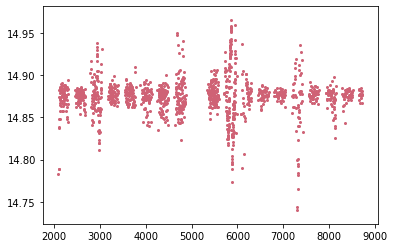

In [43]:
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=4)

<Quantity 9.29804064>

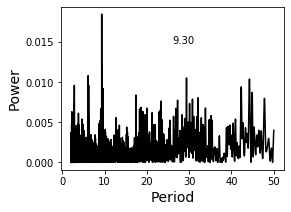

In [44]:
o.periodogram(iband,det=True,minp=2,maxp=50)

changes since so noisy but sometimes get best period of about half the X-ray period

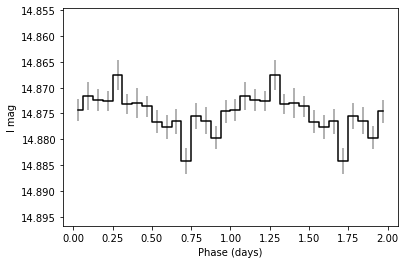

In [45]:
o.phasestep(iband,9.3,pbins=16,divide=True,det=True)

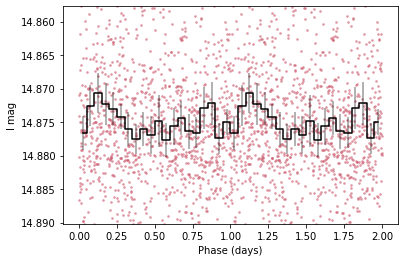

In [46]:
pd = 18.38
o.phasestep(iband,pd,pbins=20,divide=True,det=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3,alpha=0.5)

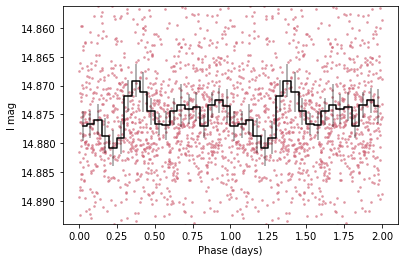

In [47]:
pd = 18.4 #within uncertainty
o.phasestep(iband,pd,pbins=20,divide=True,det=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3,alpha=0.5)

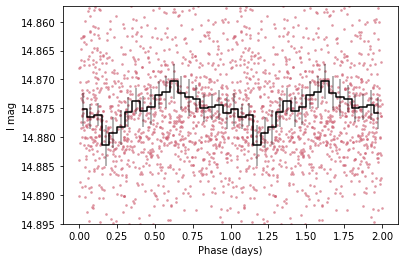

In [48]:
pd = 17.4 #best from auto (within proximity)
o.phasestep(iband,pd,pbins=20,divide=True,det=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],color=pink,s=3,alpha=0.5)

#### Source 9 (SXP 7.78): 44.92 ± 0.06
- best auto det within this uncertainty!

In [49]:
summ[summ['est. period']==44.92]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
8,9,13.02375,-72.43445,7.78,0.6,44.92,0.136825,NaN,14.768247,0.063653,...,0.34,identical with established,-2.198561,8.803889,-2.319572,10.989067,44.901697,1.0,0.0565,NO


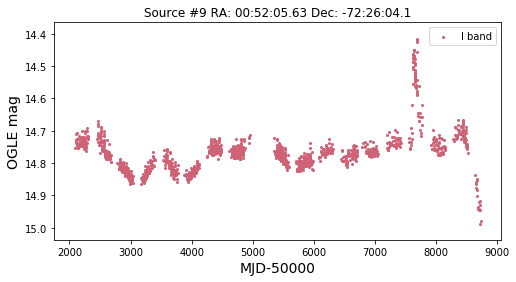

In [50]:
iband = o.getIV(9,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=300)

44.90675374544084


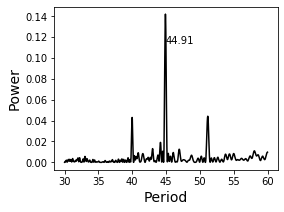

In [51]:
bp = o.periodogram(iband,det=True,minp=30,maxp=60)
print(bp)

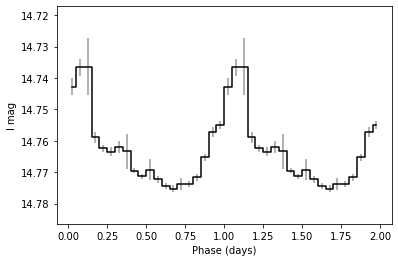

In [52]:
#best period from above -- good FRED profile
o.phasestep(iband,bp,pbins=20,det=True,divide=True)

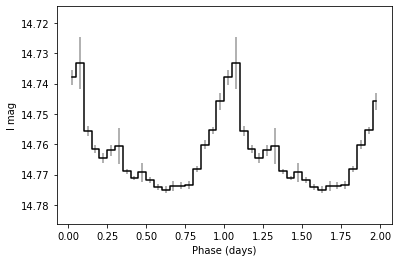

In [53]:
#established X-ray period
pd = 44.92
o.phasestep(iband,pd,pbins=20,det=True,divide=True)

#### Source 11 (SXP 8.88/8.80): 28.47 +/- 0.04 

In [54]:
summ[summ['spin period']==8.9]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
10,11,12.971667,-72.53,8.9,1.0,28.51,0.522347,NaN,14.771583,0.303708,...,NaN,1000 days sometimes,0.370673,-1.40543,0.573265,-0.557823,28.494469,1.0,0.555,NO


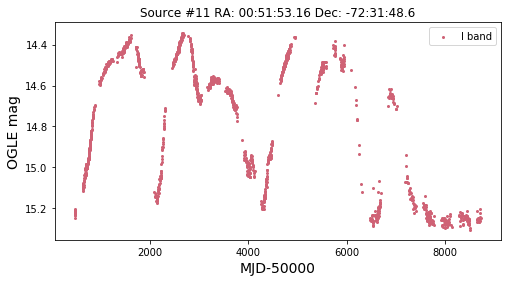

In [55]:
iband = o.getIV(11,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=300)

28.488085661756205


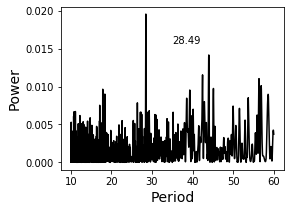

In [56]:
bp = o.periodogram(iband,det=True,minp=10,maxp=60)
print(bp) #varies a little by bounds, of course

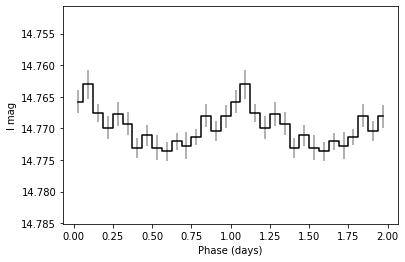

In [57]:
#best period from above
o.phasestep(iband,bp,pbins=16,det=True,divide=True)

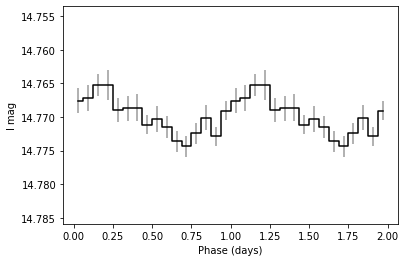

In [58]:
#established X-ray, though the above is within its uncertainty
o.phasestep(iband,28.47,pbins=16,det=True,divide=True)

# Source 12 (SXP 9.13): 77.2 +/- 0.3
- looks decent but consistently get more of 80-81 days for best

In [59]:
summ[summ['spin period']==9.13]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
11,12,12.327084,-73.20028,9.13,40.0,77.2,0.0,NaN,16.229427,0.084721,...,NaN,disagreement with est.,-0.287022,-0.348482,-1.02316,0.850715,80.847781,1.0,0.128,NO


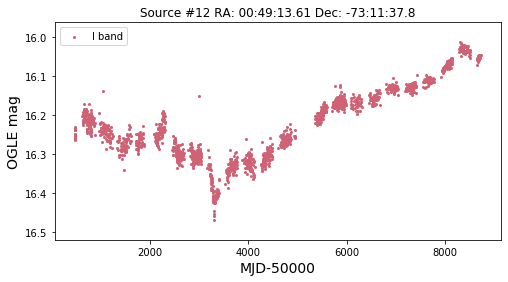

In [60]:
iband = o.getIV(12,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

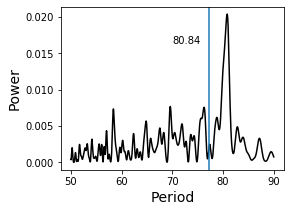

In [61]:
bp = o.periodogram(iband,det=True,minp=50,maxp=90)
plt.axvline(77.2)

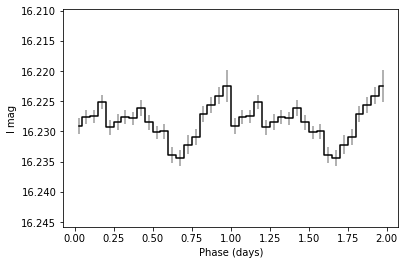

In [62]:
#best period from above
o.phasestep(iband,bp,pbins=20,det=True,divide=True)

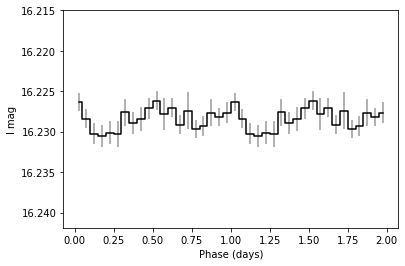

In [63]:
#established/X-ray
o.phasestep(iband,77.2,pbins=20,det=True,divide=True)

In [64]:
o.aliasarr([0.95,1.02])

array([[19.        , 51.        ],
       [ 0.48717949,  0.5049505 ]])

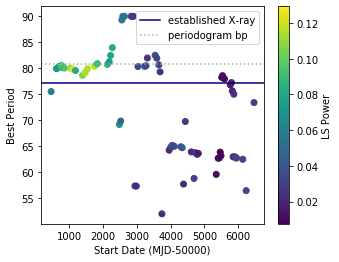

In [65]:
roll = o.rollpd(iband,npoint=300,det=True,minp=50,maxp=90)
plt.axhline(77.2,color='navy',label='established X-ray')
plt.axhline(80.84,color='darkseagreen',ls='dotted',label='periodogram bp')
plt.legend()

# Source 13 (SXP 11.48): 36.3 +/- 0.4
- best auto det is well within uncertainty

In [66]:
summ[summ['spin period']==11.48]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
12,13,16.176208,-72.90122,11.48,0.6,36.3,0.530289,NaN,15.151928,0.265656,...,NaN,NaN,0.910086,0.160328,0.659729,-0.877684,36.235884,1.0,0.349,NO


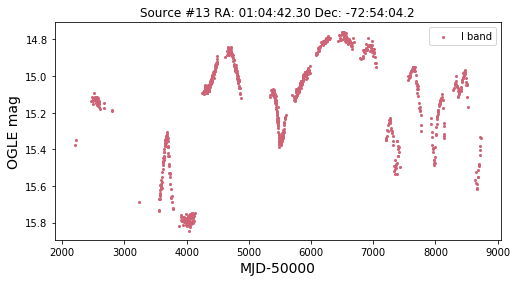

In [67]:
iband = o.getIV(13,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=700)

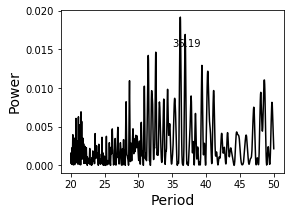

In [68]:
bp = o.periodogram(iband,det=True,minp=20,maxp=50) #fairly invariant to bounds and detrending

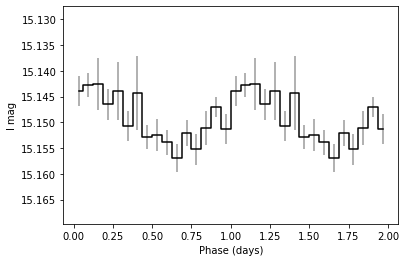

In [69]:
#using best period from above
o.phasestep(iband,bp,pbins=16,det=True,divide=True)

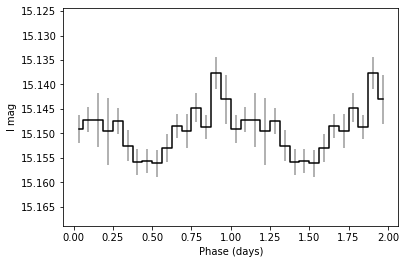

In [70]:
#using best period from auto analysis
o.phasestep(iband,36.235884,pbins=16,det=True,divide=True)

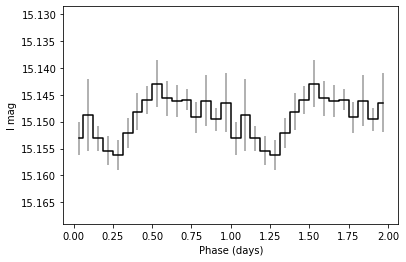

In [71]:
#using X-ray period -- bounds seem too large
o.phasestep(iband,36.3,pbins=16,det=True,divide=True)

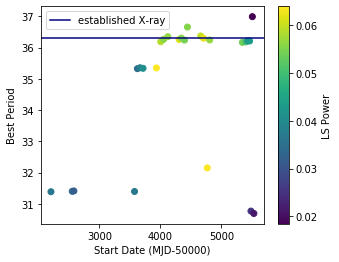

In [72]:
#see if precision can be increased with rolling search
roll = o.rollpd(iband,npoint=500,det=True,minp=20,maxp=50)
plt.axhline(36.3,color='navy',label='established X-ray')
# plt.axhline(80.84,color='darkseagreen',ls='dotted',label='periodogram bp')
plt.legend()

# Source 23 (SXP 46.6): 137.36 +/- 0.35
- best auto not quite within uncertainty bounds
- best period here a little lower: 137.36; some width

In [73]:
summ[summ['est. period']==137.36]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
21,23,13.480083,-72.44603,46.63,0.6,137.36,0.647529,NaN,14.68619,0.093824,...,NaN,NaN,1.22555,1.4785,2.927194,10.50737,137.916601,1.0,0.104,NO


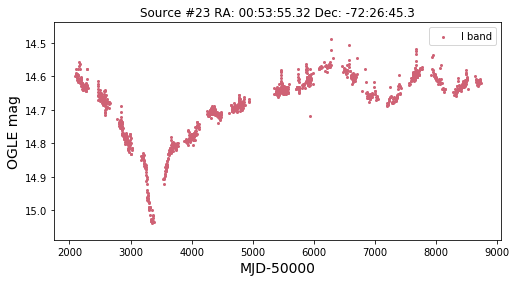

In [74]:
iband = o.getIV(23,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

In [75]:
#separate foray to check LCs of fastest sources -- all variable but different types
# fastspin = summ[summ['spin period']<10]
# fastspin = fastspin[fastspin['spin period']>0]
# fastspin = fastspin[fastspin['Part']==1]

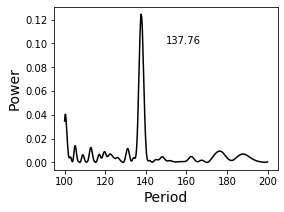

In [76]:
bp = o.periodogram(iband,det=True,minp=100,maxp=200)

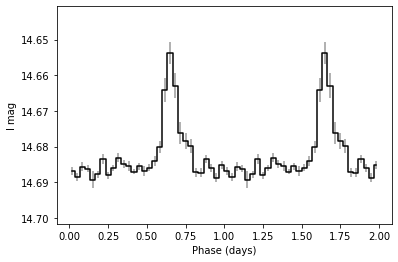

In [77]:
#best period above
o.phasestep(iband,bp,pbins=30,det=True,divide=True)

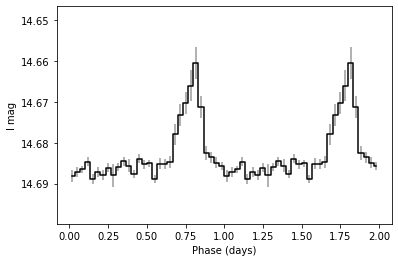

In [78]:
#established X-ray
o.phasestep(iband,137.36,pbins=30,det=True,divide=True)

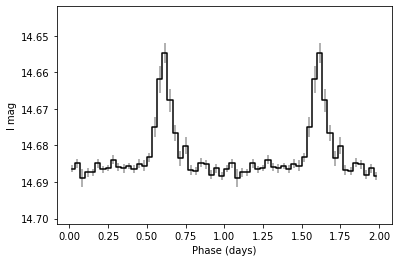

In [79]:
#best form auto analysis
o.phasestep(iband,137.916601,pbins=30,det=True,divide=True)

# Source 31 (SXP 138): 103.6 +/- 0.5


In [80]:
summ[summ['est. period']==103.6]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
28,31,13.35,-72.454445,138.0,1.0,103.6,1.16294,NaN,16.063282,0.140252,...,NaN,NaN,-0.035079,-0.488123,-0.001306,-0.410476,101.119134,1.0,0.2,NO


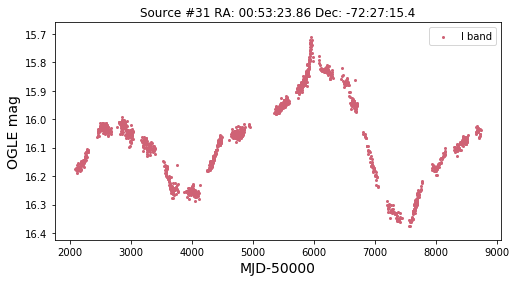

In [81]:
iband = o.getIV(31,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=500)

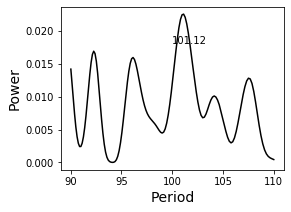

In [82]:
#have to go close to est.period to get overall peak near there
bp = o.periodogram(iband,det=True,minp=90,maxp=110)

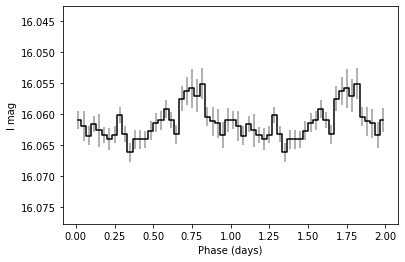

In [83]:
#best period above
o.phasestep(iband,bp,pbins=30,det=True,divide=True)

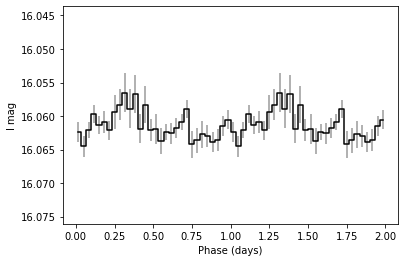

In [84]:
#est. X-ray period
o.phasestep(iband,103.6,pbins=30,det=True,divide=True)

# Source 36 (SXP 169/165): 68.54 +/- 0.15
- FRED profile
- relatively low power in periodogram but still highest peak (within <day of established,at least)

In [85]:
summ[summ['est. period']==68.54]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
32,36,13.229781,-71.96826,169.3,0.51,68.54,0.0,NaN,15.375166,0.034089,...,NaN,NaN,0.083046,-0.55959,0.657991,1.189636,68.616612,1.0,0.049,NO


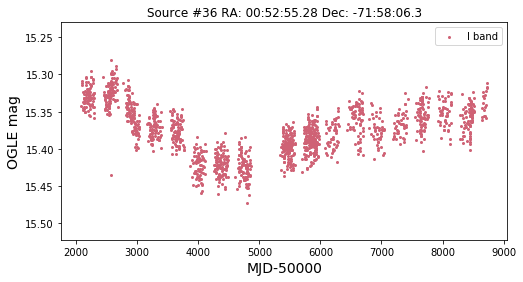

In [86]:
iband = o.getIV(36,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=500)

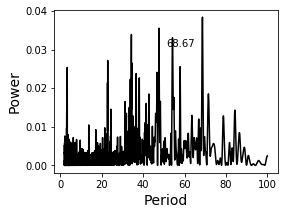

In [87]:
bp = o.periodogram(iband,det=True,minp=2,maxp=100)

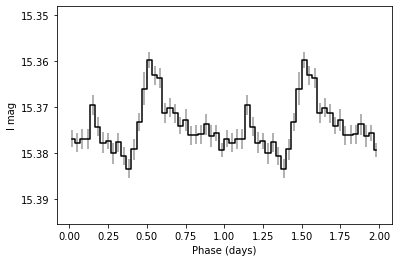

In [88]:
#bp above
o.phasestep(iband,bp,pbins=30,divide=True,det=True)

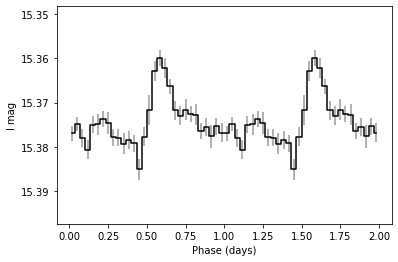

In [89]:
#bp from auto analysis
o.phasestep(iband,68.616612,pbins=30,divide=True,det=True)

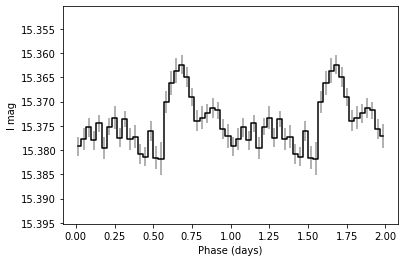

In [90]:
#established X-ray -- very similar to right above
o.phasestep(iband,68.54,pbins=30,divide=True,det=True)

# Source 37 (SXP 172): 70.42 +/- 0.15
- est. period 67.88, and don't know source, but 70.42 +/- 0.15 is period from X-ray
- est. X-ray doesn't look great

In [91]:
summ[summ['spin period']==172]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
33,37,12.96625,-73.175835,172.0,0.87,67.88,0.927393,NaN,14.347119,0.080958,...,NaN,NaN,0.643526,0.341968,1.780884,6.568828,68.592332,1.0,0.13075,NO


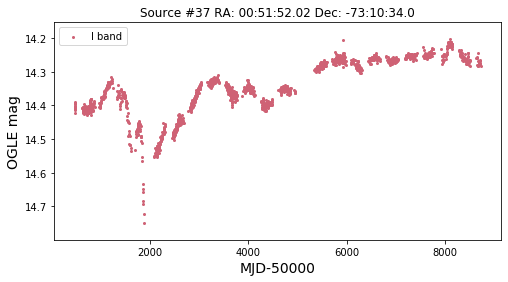

In [92]:
iband = o.getIV(37,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

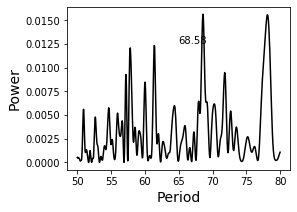

In [93]:
#bounds have to be this close to get top peak
bp = o.periodogram(iband,det=True,minp=50,maxp=80)

(14.355, 14.34)

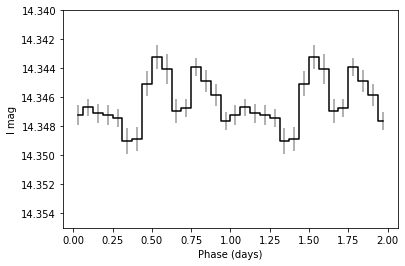

In [94]:
#bp above
o.phasestep(iband,bp,pbins=16,divide=True,det=True)
plt.ylim(14.355,14.34)

(14.352, 14.34)

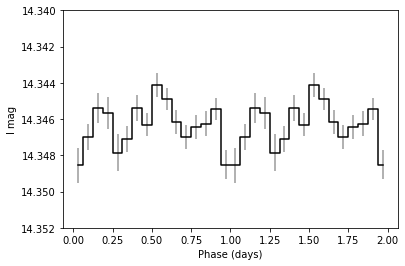

In [95]:
#established X-ray 
o.phasestep(iband,70.42,pbins=16,divide=True,det=True)
plt.ylim(14.352,14.34)

(14.352, 14.34)

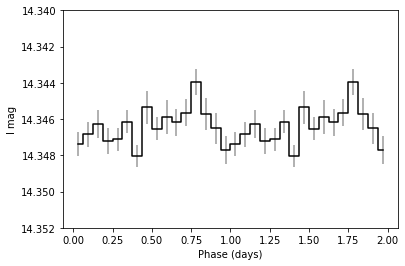

In [96]:
#established in table
o.phasestep(iband,67.88,pbins=16,divide=True,det=True)
plt.ylim(14.352,14.34)

# Source 44 (SXP 280): 64.8 +/- 0.2


In [97]:
summ[summ['est. period']==64.8]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
39,44,14.455669,-72.0432,280.4,0.5,64.8,1.173049,NaN,15.388894,0.06577,...,NaN,NaN,-0.167377,-1.08648,-0.344749,-0.217247,63.569633,1.0,0.113,NO


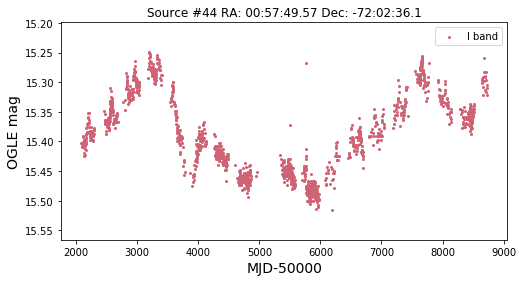

In [98]:
iband = o.getIV(44,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

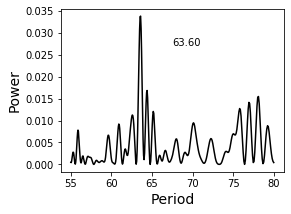

In [99]:
bp = o.periodogram(iband,det=True,minp=55,maxp=80) #otherwise peak at 52 slightly taller

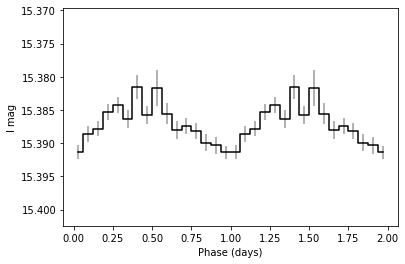

In [100]:
#bp above
o.phasestep(iband,bp,pbins=16,divide=True,det=True)

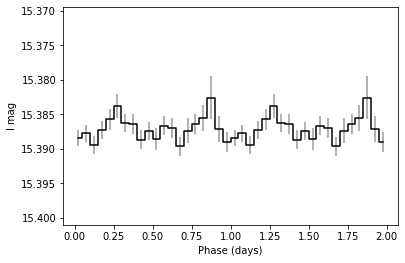

In [103]:
#X-ray established -- looks better at other values within uncertainty, though
o.phasestep(iband,64.8,pbins=20,divide=True,det=True)

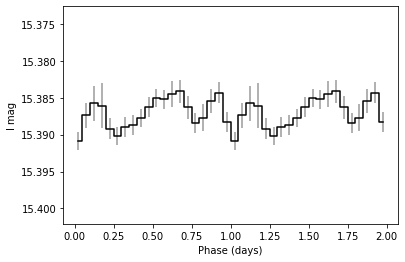

In [105]:
o.phasestep(iband,64.6,pbins=20,divide=True,det=True)

# Source 49 (SXP 323): 116.6 +/- 0.6
- very noisy,lower-powered periodogram
- good example for quiescent -- est. X-ray period hard to pick out

In [269]:
summ[summ['est. period']==116.6]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
44,49,12.685833,-73.26806,323.2,0.6,116.6,0.467101,NaN,15.231858,0.042198,...,NaN,NaN,0.199341,-0.618193,11.33146,133.547612,105.000179,1.0,0.067,NO


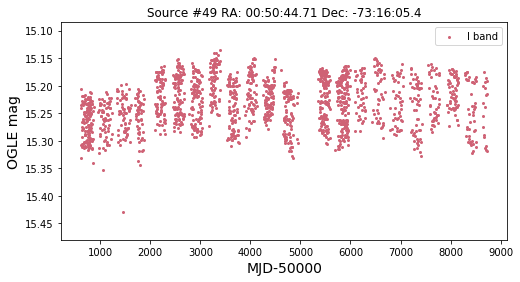

In [313]:
iband = o.getIV(49,cross,both=False,plot=True,stack=True)
# plt.savefig('QFigs/g49.png',dpi=100,bbox_inches='tight')
o.splinedetrend(iband,window=100)

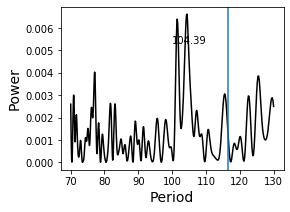

In [280]:
bp = o.periodogram(iband,det=False,minp=70,maxp=130) 
plt.axvline(116.6)

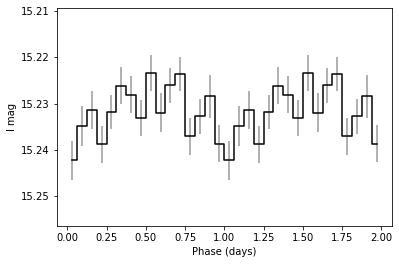

In [282]:
#bp above
o.phasestep(iband,bp,pbins=16,divide=True,det=False)

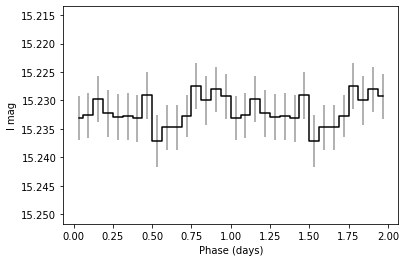

In [298]:
#X-ray established
o.phasestep(iband,116.6,pbins=16,divide=True,det=False)

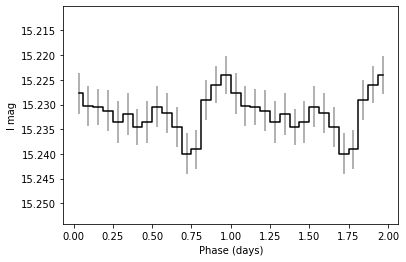

In [312]:
#looks better at values within X-ray established lower bounds
o.phasestep(iband,116.0,pbins=16,divide=True,det=False)

In [ ]:
summ[summ['est. period']==116.6]

# Source 54 (SXP 504): 265.3 +/- 2.9
- established orbital period apparently uncertain; Schmidtke also has an optical best period of ~270
- so 270 really could be correct (over this X-ray period)

- 270-271 gives nice FRED
- exact established doesn't look good

In [314]:
summ[summ['est. period']==265.3]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
49,54,13.733069,-72.75302,499.2,0.51,265.3,0.453019,NaN,14.76675,0.033795,...,NaN,NaN,0.104924,-0.744588,-0.607571,-0.112791,271.317163,1.0,0.049,NO


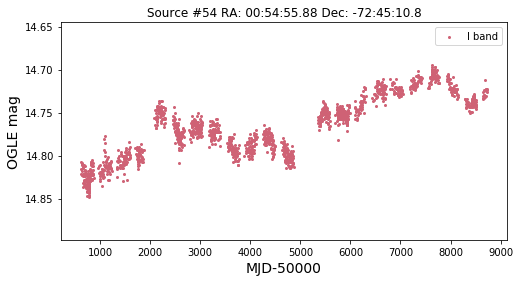

In [342]:
iband = o.getIV(54,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

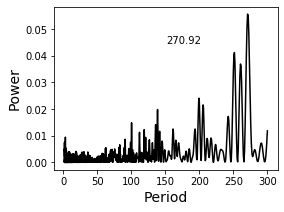

In [345]:
bp = o.periodogram(iband,det=False,minp=2,maxp=300) #best before 300 when not detrended

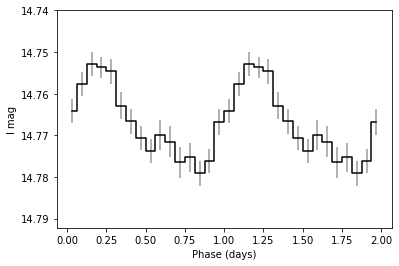

In [321]:
#bp above
o.phasestep(iband,bp,pbins=16,divide=True,det=False)

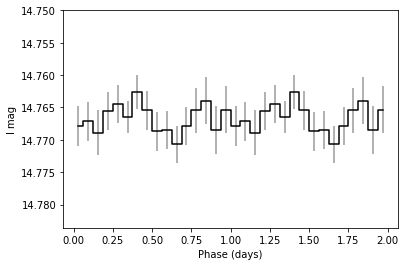

In [326]:
#X-ray (uncertain) established
o.phasestep(iband,265.3,pbins=16,divide=True,det=False)

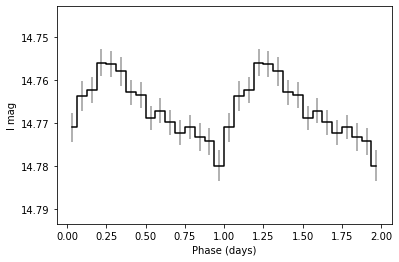

In [327]:
#other values within uncertainty look better
o.phasestep(iband,262,pbins=16,divide=True,det=False)

# Source 56 (SXP 565): 151.8 +/- 1.0
- est. here says 151.0
- best auto det period just outside of uncertainty

In [330]:
summ[summ['spin period']==565]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
51,56,14.400833,-72.32611,565.0,0.7,151.0,0.667688,NaN,15.798923,0.025057,...,NaN,NaN,0.054376,0.605789,-0.013256,-0.145211,153.506823,1.0,0.036,NO


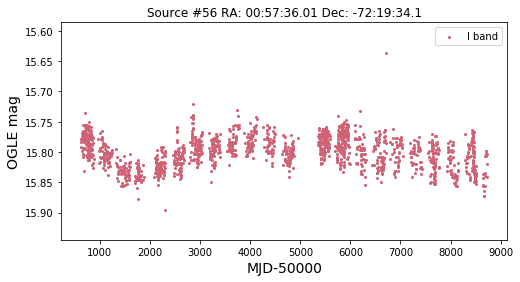

In [346]:
iband = o.getIV(56,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

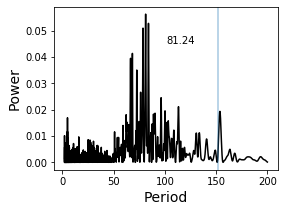

In [347]:
bp = o.periodogram(iband,det=True,minp=2,maxp=200) 
plt.axvline(151.8,alpha=0.4)

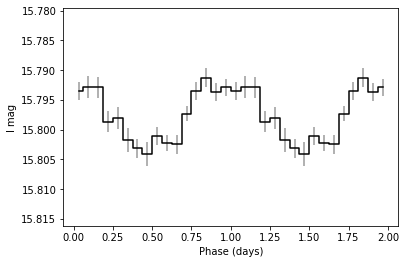

In [348]:
#completely different best period -- ~sinusoidal
o.phasestep(iband,bp,pbins=16,divide=True,det=True)

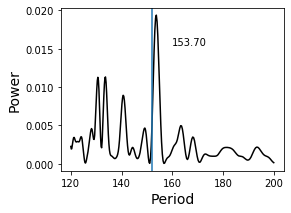

In [352]:
#zooming in to get peak near established
bp = o.periodogram(iband,det=True,minp=120,maxp=200) 
plt.axvline(151.8)

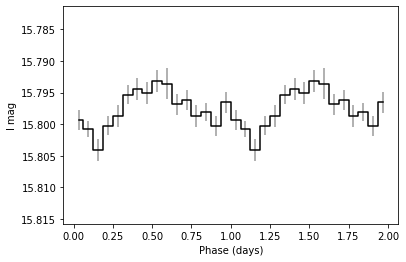

In [353]:
#bp above
o.phasestep(iband,bp,pbins=16,divide=True,det=True)

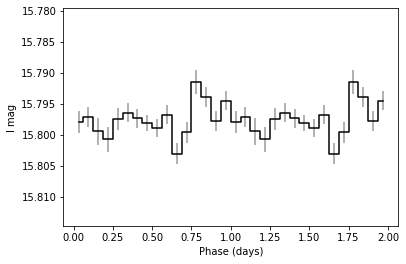

In [354]:
#established X-ray
o.phasestep(iband,151.8,pbins=16,divide=True,det=True)

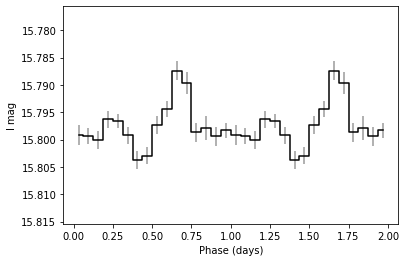

In [361]:
#within uncertainty
o.phasestep(iband,152.8,pbins=16,divide=True,det=True)

# Source 60 (SXP 756): 389.9 +/- 7.0
- good example of another period winning out in periodogram b/c more sinusoidal

In [369]:
summ[summ['est. period']==390]

,src_n,ra_deg,dec_deg,spin period,perr,est. period,sep,name,mean I,stdev I,...,Type II amp,note,I skew,I kurtosis,V skew,V kurtosis,best auto det pd,Part,I IQR,aperiodic quiescence
55,60,12.425474,-73.38738,755.5,0.52,390.0,0.531412,NaN,14.613751,0.09112,...,NaN,NaN,-1.468944,4.793973,-0.799184,1.847218,350.691566,1.0,0.099,NO


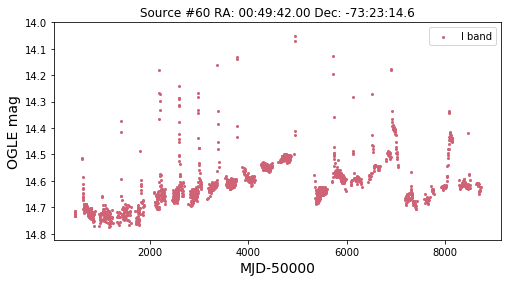

In [367]:
iband = o.getIV(60,cross,both=False,plot=True,stack=True)
o.splinedetrend(iband,window=100)

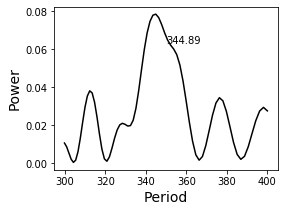

In [372]:
#peak in wide search but zooming for more samples
bp = o.periodogram(iband,det=False,minp=300,maxp=400) 

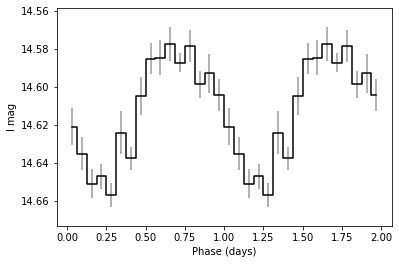

In [376]:
#bp above
o.phasestep(iband,bp,pbins=16,divide=True,det=False)

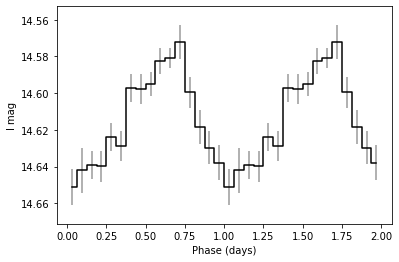

In [377]:
#bp auto analysis
o.phasestep(iband,350.691566,pbins=16,divide=True,det=False)

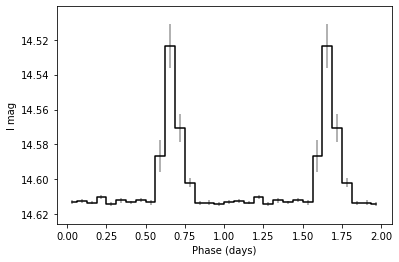

In [385]:
#best X-ray (and uncertain bounds look plausible as well)
o.phasestep(iband,389.9,pbins=16,divide=True,det=True)

# See Review of this Notebook in Notes